In [1]:
# baby tests

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pprint

# metrics to consider
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
smoker_data_df = pd.read_csv('smoker_status.csv')  

In [3]:
# get gold labels
smoker_gold =  dict(zip(smoker_data_df.row_id, smoker_data_df.status))

In [4]:
# check types of key and value
key1 = list(smoker_gold.keys())[0]
print(key1, 'type:', type(key1))

value1 = smoker_gold[key1]
print(value1, 'type: ', type(value1))

11911 type: <class 'int'>
Unknown type:  <class 'str'>


In [5]:
# smoker_gold

In [6]:
# for validating keys (patient identifiers) are the same order
gold_patients = list(smoker_gold.keys())
gold_statuses = list(smoker_gold.values())

In [7]:
fake_pred_patients = [11911,  5853,  5366,  36155,  19896,  5377,  46361,  12798,  47211,  10377,  34014,  29676,  
                      42884,  14238,  4053,  32565,  30698,  31431,  6838,  36898,  23341,  6644,  17708,  53596,  
                      20403,  7256,  46701,  1030,  21910,  49089,  34464,  24790,  32978,  33349,  25411,  51000,  
                      18687,  29869,  51692,  50867,  52244,  2629,  15564,  29718,  12663,  26743,  50129,  49710,  
                      35305,  2900,  20173,  45881,  35495,  23216,  20796,  41523,  58482,  29654,  51831,  32750,  
                      6698,  30870,  4547,  47290,  43336,  3117,  19217,  12516,  37035,  13774] 
                        # last number changed from 7 to 4

In [8]:
assert gold_patients == fake_pred_patients, 'Patient identifier lists are not identical.' 

AssertionError: Patient identifier lists are not identical.

In [9]:
fake_pred_statuses = ['Unknown',  'Former Smoker',  'Former Smoker',  'Former Smoker',  'Unknown',  'Smoker',  
                      'Smoker',  'Smoker',  'Smoker',  'Smoker',  'Smoker',  'Former Smoker',  'Former Smoker',  
                      'Smoker',  'Smoker',  'Non Smoker',  'Non Smoker',  'Unknown',  'Former Smoker',  
                      'Former Smoker',  'Smoker',  'Smoker',  'Former Smoker',  'Former Smoker',  'Smoker',  
                      'Former Smoker',  'Former Smoker',  'Non Smoker',  'Unknown',  'Smoker',  'Smoker',  
                      'Smoker',  'Unknown',  'Former Smoker',  'Unknown',  'Former Smoker',  'Former Smoker',  
                      'Non Smoker',  'Non Smoker',  'Former Smoker',  'Former Smoker',  'Smoker',  'Former Smoker',  
                      'Former Smoker',  'Smoker',  'Non Smoker',  'Smoker',  'Former Smoker',  'Former Smoker',  
                      'Former Smoker',  'Smoker',  'Smoker',  'Smoker',  'Smoker',  'Former Smoker',  
                      'Non Smoker',  'Former Smoker',  'Smoker',  'Former Smoker',  'Unknown',  'Former Smoker',  
                      'Unknown', 'Smoker',  'Former Smoker',  'Smoker',  'Non Smoker',  'Smoker',  'Unknown',  
                      'Smoker', 'Smoker']
                      # changed last from Former Smoker to Smoker

In [10]:
accuracy = accuracy_score(gold_statuses, fake_pred_statuses)
print(accuracy)

0.9857142857142858


In [11]:
balanced_accuracy = balanced_accuracy_score(gold_statuses, fake_pred_statuses)
print(balanced_accuracy)

0.9907407407407407


In [12]:
label_names = ['Former Smoker', 'Non Smoker', 'Smoker', 'Unknown'] # alphabetised 

precision = precision_score(gold_statuses, fake_pred_statuses, average=None)
print(precision)

# as dict
class_report_dict = classification_report(gold_statuses, fake_pred_statuses, 
                                     target_names = label_names,
                                     output_dict = True)

pprint.pprint(class_report_dict)

[1.         1.         0.96296296 1.        ]
{'Former Smoker': {'f1-score': 0.9811320754716981,
                   'precision': 1.0,
                   'recall': 0.9629629629629629,
                   'support': 27},
 'Non Smoker': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 8},
 'Smoker': {'f1-score': 0.9811320754716981,
            'precision': 0.9629629629629629,
            'recall': 1.0,
            'support': 26},
 'Unknown': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 9},
 'accuracy': 0.9857142857142858,
 'macro avg': {'f1-score': 0.9905660377358491,
               'precision': 0.9907407407407407,
               'recall': 0.9907407407407407,
               'support': 70},
 'weighted avg': {'f1-score': 0.9857142857142858,
                  'precision': 0.9862433862433863,
                  'recall': 0.9857142857142858,
                  'support': 70}}


In [13]:
class_report = classification_report(gold_statuses, fake_pred_statuses, target_names = label_names)
print(class_report)

               precision    recall  f1-score   support

Former Smoker       1.00      0.96      0.98        27
   Non Smoker       1.00      1.00      1.00         8
       Smoker       0.96      1.00      0.98        26
      Unknown       1.00      1.00      1.00         9

     accuracy                           0.99        70
    macro avg       0.99      0.99      0.99        70
 weighted avg       0.99      0.99      0.99        70



In [14]:
classreport_df = pd.DataFrame.from_dict(class_report_dict).transpose()
print(classreport_df)

               precision    recall  f1-score    support
Former Smoker   1.000000  0.962963  0.981132  27.000000
Non Smoker      1.000000  1.000000  1.000000   8.000000
Smoker          0.962963  1.000000  0.981132  26.000000
Unknown         1.000000  1.000000  1.000000   9.000000
accuracy        0.985714  0.985714  0.985714   0.985714
macro avg       0.990741  0.990741  0.990566  70.000000
weighted avg    0.986243  0.985714  0.985714  70.000000


In [15]:
precision_mic = precision_score(gold_statuses, fake_pred_statuses, average='micro')
precision_mic

0.9857142857142858

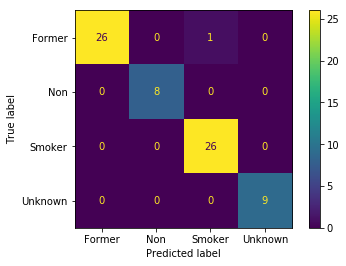

In [16]:
# confusion matrix + display
cm = confusion_matrix(gold_statuses, fake_pred_statuses)

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                               display_labels = ['Former', 'Non', 'Smoker', 'Unknown'])
disp.plot()
plt.show()

# dataaa = 'smoker_status.csv'
# data = dataaa[:-4]
# cm_path = data + '-cm.png'
# plt.savefig(cm_path)

In [24]:
# check if .transpose() is adding/changing values in accuracy
class_report_dict = classification_report(gold_statuses, fake_pred_statuses, 
                                 target_names = label_names,
                                 output_dict = True)
# classreport_df = pd.DataFrame.from_dict(class_report_dict).transpose()
class_report_df = pd.DataFrame.from_dict(class_report_dict)
print(class_report_dict)
class_report_df
# cr_path = data + '-classreport.csv'
# classreport_df.to_csv(cr_path, index=False)

## **accuracy does not change, applies for all, .transpose() is not adding values 

{'Former Smoker': {'precision': 1.0, 'recall': 0.9629629629629629, 'f1-score': 0.9811320754716981, 'support': 27}, 'Non Smoker': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}, 'Smoker': {'precision': 0.9629629629629629, 'recall': 1.0, 'f1-score': 0.9811320754716981, 'support': 26}, 'Unknown': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}, 'accuracy': 0.9857142857142858, 'macro avg': {'precision': 0.9907407407407407, 'recall': 0.9907407407407407, 'f1-score': 0.9905660377358491, 'support': 70}, 'weighted avg': {'precision': 0.9862433862433863, 'recall': 0.9857142857142858, 'f1-score': 0.9857142857142858, 'support': 70}}


,Former Smoker,Non Smoker,Smoker,Unknown,accuracy,macro avg,weighted avg
precision,1.000000,1.0,0.962963,1.0,0.985714,0.990741,0.986243
recall,0.962963,1.0,1.000000,1.0,0.985714,0.990741,0.985714
f1-score,0.981132,1.0,0.981132,1.0,0.985714,0.990566,0.985714
support,27.000000,8.0,26.000000,9.0,0.985714,70.000000,70.000000
